# Shallow Neural Networks

Shallow neural networks are represented as functions mapping multivariate inputs to multivariate outputs, formalized as $y = f(x, \phi)$. These functions are characterized by parameters $\phi$, constituting a family of continuous piecewise linear functions. For a given network with up to four linear regions, the output $y$ can be expressed as:

$$\begin{equation}
y = f(x,\phi) = \phi_0 + \sum_{i=1}^{D} \phi_i \cdot a(\theta_{i0}+\theta_{i1} \cdot x)
\end{equation}$$

- where $a[\cdot]$ denotes the activation function.

The process involves:

- Computing linear combinations of input data: $\theta_{i0} + \theta_{i1}x$
- Applying an activation function $a[•]$
- Weighting activated outputs and adding an offset $\phi_0$

The commonly used activation function is the rectified linear unit (ReLU), defined as:

$$\begin{equation}
a(z) = \text{ReLU}(z) =
\begin{cases}
0 & \text{if } z < 0 \\
z & \text{if } z \geq 0
\end{cases}
\end{equation}$$

Introducing intermediate quantities termed as hidden units ($h_1$, $h_2$, $h_3$), we simplify the network's structure:

$$\begin{align}
h_1 &= a(\theta_{10} + \theta_{11} \cdot x) \\
h_2 &= a(\theta_{20} + \theta_{21} \cdot x) \\
h_3 &= a(\theta_{30} + \theta_{31} \cdot x)
\end{align}$$

The output $y$ is then a linear combination of these hidden units for that example:

$$\begin{equation}
y = \phi_0 + \sum_{i=1}^{3} \phi_i h_i
\end{equation}$$

In general, for a network with $D$ hidden units, each defined as $h_d = a(\theta_{d0} + \theta_{d1} \cdot x)$, the output is:

$$\begin{equation}
y = \phi_{0} + \sum_{d=1}^{D}(\phi_{d} \cdot h_{d})
\end{equation}$$

**This theorem states that a shallow network can approximate any continuous function to arbitrary precision, given sufficient hidden units.**

Extending to multivariate inputs and outputs, the network is capable of mapping inputs $x \in \mathbb{R}^{D_i}$ to outputs $y \in \mathbb{R}^{D_o}$:

$$\begin{align}
h_1 &= a(\theta_{10}+\theta_{11} \cdot x) \\
&\vdots \\
h_D &= a(\theta_{D0}+\theta_{D1} \cdot x) \\
y_j &= \phi_{j0} + \sum_{d=1}^{D}(\phi_{jd} \cdot h_d) \quad \text{for } j=1,2,\ldots,D_o
\end{align}$$

The general equation for a shallow neural network with multi-dimensional input $x \in \mathbb{R}^{D_i}$ and output $y \in \mathbb{R}^{D_o}$, using $D$ hidden units, is given by:

$$\begin{align}
h_d &= a\left(\theta + \sum_{i = 1}^{D_i}(\theta_{di} \cdot x_i)\right) \\
y_j &= \phi_{j0} + \sum_{d = 1}^{D}(\phi_{jd} \cdot h_d)
\end{align}$$

This setup illustrates the feed-forward mechanism of shallow networks, highlighting their ability to approximate complex functions through a composition of linear transformations and non-linear activations.







In [2]:
import numpy as np,matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [5]:
inputSample = np.array([1.0,2.0,3.0]) # Example input (can be multidimensional)
parametersPhi = np.array(
    [
        0.5,
        1.0,
        0.5,
        0.5
    ]
) # Output layer parameters (phi_0, phi_1, phi_2, phi_3)
parametersTheta = np.array(
    [
        0.1, # Hidden unit parameter
        0.2, # Hidden unit parameter
        0.3, # Hidden unit parameter
        0.4, # Hidden unit parameter
        0.5, # Hidden unit parameter
        0.6  # Hidden unit parameter
    ]
) # Example parameters (theta)

In [4]:
def ReLU(preActivation:np.ndarray)->np.ndarray:
  return np.maximum(0,preActivation)

In [6]:
def ShallowNN(inputs:np.ndarray,phi:np.ndarray,theta:np.ndarray)->np.ndarray:
  phi_0,phi_1,phi_2,phi_3 = phi
  theta_10,theta_11,theta_20,theta_21,theta_30,theta_31 = theta
  z1 = theta_10+theta_11*inputs # linear functions of the input data
  z2 = theta_20+theta_21*inputs # linear functions of the input data
  z3 = theta_30+theta_31*inputs # linear functions of the input data
  a1 = ReLU(z1) # hidden unit
  a2 = ReLU(z2) # hidden unit
  a3 = ReLU(z3) # hidden unit
  output = phi_0+phi_1*a1+phi_2*a2+phi_3*a3
  return output

In [7]:
groundTruth = ShallowNN(inputSample,parametersPhi,parametersTheta)
print(f"Shape of output: {groundTruth.shape}")

Shape of output: (3,)


In [8]:
print(f"Ground Truth:\n{groundTruth}")

Ground Truth:
[1.7 2.4 3.1]


In [9]:
assert inputSample.shape == groundTruth.shape, "[Input data and output data shapes are not the same]" # shape control

In [11]:
def ShallowNNAdditional(inputs:float|int,phi:np.ndarray,theta:np.ndarray)->np.ndarray:
  """
    A shallow neural network implementation.

    Parameters:
    - inputs: Scalar input to the network.
    - phi: Parameters for the output layer (including phi_0 as the bias term).
    - theta: Parameters for the hidden layer (theta_n0 as bias, theta_n1 as weight for each hidden unit).

    Returns:
    - y: Output of the network.
  """
  # Compute the hidden layer activations
  linearOutputs = []
  for t in theta:
    z = t[0]+t[1]*inputs
    linearOutputs.append(z)
  y = phi[0] # Start with the bias term
  for idx,preActivation in enumerate(linearOutputs):
    y += phi[idx+1]*ReLU(preActivation)
  return y

In [12]:
phiValues = [0.5,1.2,-0.7,0.3] # Output layer parameters (phi_0, phi_1, phi_2, phi_3)
thetaValues = [
    [0.1,0.4],  # Hidden unit 1 parameters (theta_10, theta_11)
    [-0.2,0.5], # Hidden unit 2 parameters (theta_20, theta_21)
    [0.4,-0.6]  # Hidden unit 3 parameters (theta_30, theta_31)
]

In [13]:
inputSample = 0.5
y = ShallowNNAdditional(inputSample,phiValues,thetaValues)
print(f"Network Output for Input: {inputSample} --> ::[{y}]::")

Network Output for Input: 0.5 --> ::[0.8550000000000001]::


- with loss:

**Simple linear regression to predict y**

**Assuming a model y = theta_0 + theta_1 * x, we can use a simple approach to estimate theta_0 and theta_1**

In [14]:
np.random.seed(0) # For reproducibility

In [15]:
dataPoints = 2*np.random.rand(100,1) # 100 data points
groundTruth = 4+3*dataPoints+np.random.randn(100,1) # y = 4 + 3x + Gaussian noise

In [19]:
assert dataPoints.shape == groundTruth.shape,"[Input data and output data do not have the same shape]" # shape control

In [20]:
# Calculate theta_1 (slope) and theta_0 (intercept) using the Normal Equation
x_b = np.c_[np.ones((100,1)),dataPoints] # Add x0 = 1 to each instance
thetaBest = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(groundTruth) # Fitting the Model

`np.linalg.inv(...)`: computes the inverse of the resulting square matrix from the previous step.

In [24]:
# Calculate the least squares loss
yPredictions = x_b.dot(thetaBest)
leastLoss = np.mean((groundTruth-yPredictions)**2)

In [26]:
print(f"Predicted Values Shape:\n{yPredictions.shape}\n--> Least Squares Loss: {leastLoss}")

Predicted Values Shape:
(100, 1)
--> Least Squares Loss: 0.9924386487246483


- simple version with different parameters to find loss values:

In [29]:
def LeastLoss(groundTruth:np.ndarray,predictions:np.ndarray)->float:
  return np.mean((groundTruth-predictions)**2)

In [34]:
# Generate a simple dataset
np.random.seed(0)
inputs = 2*np.random.randn(100,1) # 100 data points
groundTruth = 4+3*inputs+np.random.randn(100,1) # y = 4 + 3x + Gaussian noise

In [35]:
phiValues = np.array([1,2,2,1]) # Just an example, not optimal
thetaValues = np.array([0.5,1,-0.5,1,0.5,-1]) # Just an example, not optimal

In [36]:
predictions = ShallowNN(inputs,phiValues,thetaValues)

In [37]:
initialLoss = LeastLoss(groundTruth,predictions)
print(f"Initial Loss:\n{initialLoss}")

Initial Loss:
20.80215244156757


In [38]:
# Visualization of the loss with varying phi_1 while keeping other parameters constant
phi_1s = np.linspace(-1,1,100)
losses = []
for phi in phi_1s:
  phiValues[1] = phi # Update phi_1
  predictions = ShallowNN(inputs,phiValues,thetaValues)
  loss = LeastLoss(groundTruth,predictions)
  losses.append(loss)
print(f"Minimum Loss:\n{np.min(losses)}")

Minimum Loss:
25.782260498146023


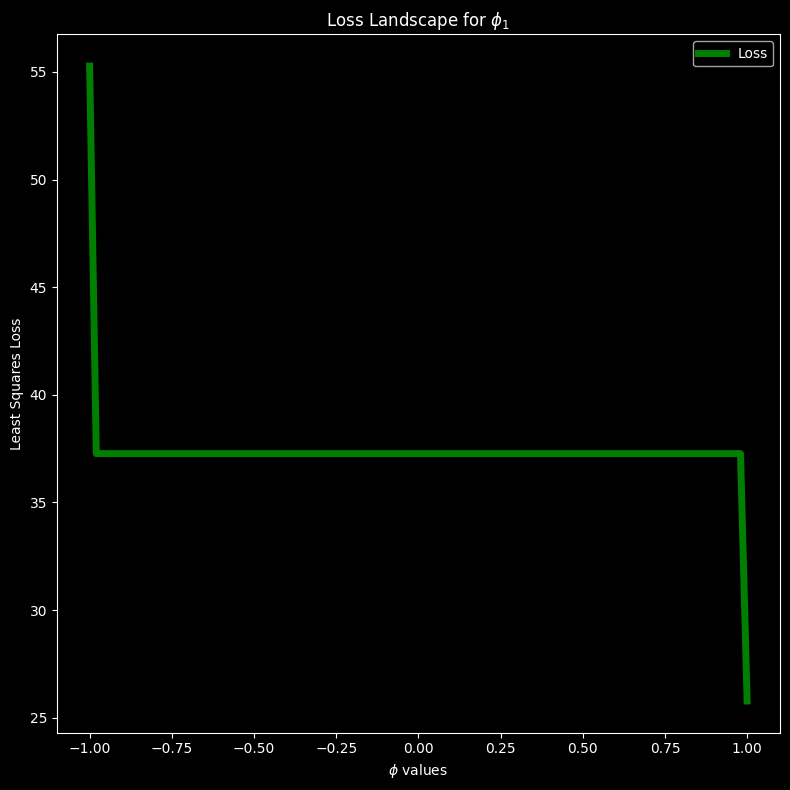

In [40]:
plt.figure(figsize=(8,8))
plt.title("Loss Landscape for $\phi_1$")
plt.xlabel("$\phi$ values")
plt.ylabel("Least Squares Loss")
plt.plot(phi_1s,losses,label="Loss",color="green",linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()

- example for Universal Approximation Theorem:

In [41]:
np.random.seed(20) # For reproducible random results

In [43]:
def ShallowNNTheorem(inputSample:np.ndarray,D:int,theta:np.ndarray,phi:np.ndarray)->np.ndarray:
  hiddenBase = np.zeros((len(inputSample),D)) # Initialize hidden layer outputs
  for d in range(D):
    preActivation = theta[d,0]+theta[d,1]*inputSample
    hiddenBase[:,d] = ReLU(preActivation)
  result = phi[0]+np.dot(hiddenBase,phi[1:])
  return result

In [44]:
def TargetFunction(inputSample:np.ndarray)->np.ndarray:
  return np.sin(inputSample)

In [45]:
inputs = np.linspace(-np.pi,np.pi,200) # Input values

In [46]:
hiddenUnits_D = [1,4,8,16,22,30] # Different numbers of hidden units
thetaValues = np.random.randn(max(hiddenUnits_D),2) # Random theta parameters for all demonstrations
phiValues = np.random.randn(max(hiddenUnits_D)+1) # Random phi parameters for all demonstrations

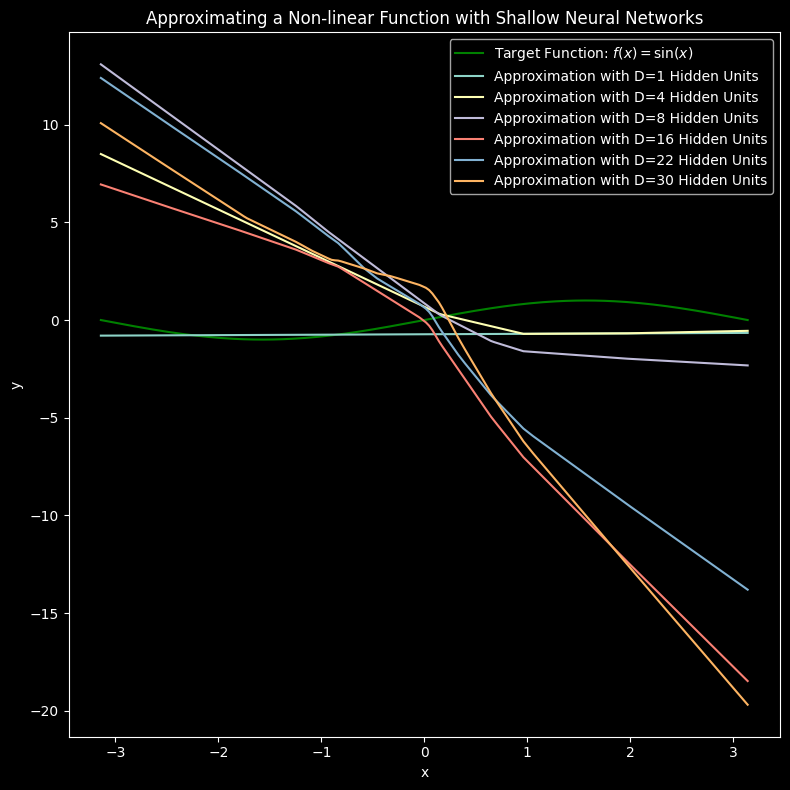

In [49]:
plt.figure(figsize=(8,8))
plt.title("Approximating a Non-linear Function with Shallow Neural Networks")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(
    inputs,
    TargetFunction(inputs),
    label="Target Function: $f(x) = \sin(x)$",
    color="green"
)
for D in hiddenUnits_D:
  yApprox = ShallowNNTheorem(inputs,D,thetaValues[:D],phiValues[:D+1]) # Adjust theta and phi based on D
  plt.plot(inputs,yApprox,label=f"Approximation with D={D} Hidden Units")
plt.legend()
plt.tight_layout()
plt.show()

- scenario:

In [50]:
np.random.seed(42) # Ensure reproducibility
inputs = np.linspace(-3,3,200).reshape(-1,1) # Input features

In [52]:
groundTruth = 4+3*inputs-2*inputs**2+np.random.randn(200,1) # Non-linear relationship + noise

In [69]:
phi_1Range = np.linspace(-5,5,20)
phi_2Range = np.linspace(-5,5,20)

In [70]:
# Track the best parameters and the minimum loss
minimumLoss = np.inf
bestPhi_1, bestPhi_2 = None,None

In [71]:
# Initial phi setup; we'll modify phi_1 and phi_2
phiValues = np.array([1,0,0,0])
thetaValues = np.array([0.1,0.2,0.3,0.4,0.5,0.6])

In [72]:
for _,p1 in enumerate(phi_1Range):
  for cx,p2 in enumerate(phi_2Range):
    phiValues[1] = p1 # Update phi_1
    phiValues[2] = p2 # Update phi_2
    outputs = ShallowNN(inputs,phiValues,thetaValues)
    loss = LeastLoss(groundTruth,outputs)
    if loss < minimumLoss:
      minimumLoss = loss
      bestPhi_1,bestPhi_2 = p1,p2
      print(f"Loss ::[{loss}]:: for step: {cx}")
print(f"Minimum Loss:\n{minimumLoss} arrived at Phi-1: {bestPhi_1} & Phi-2: {bestPhi_2}")

Loss ::[96.1511986143027]:: for step: 0
Loss ::[89.27949867102916]:: for step: 1
Loss ::[83.35189136430519]:: for step: 2
Loss ::[78.3683766941308]:: for step: 4
Loss ::[74.328954660506]:: for step: 6
Loss ::[71.23362526343078]:: for step: 8
Loss ::[69.08238850290515]:: for step: 12
Loss ::[67.87524437892908]:: for step: 14
Loss ::[67.6121928915026]:: for step: 16
Minimum Loss:
67.6121928915026 arrived at Phi-1: -5.0 & Phi-2: 3.421052631578947
